In [8]:
import pandas as pd

# Load data
drivers = pd.read_csv('D:/Desktop/APPLIED DS/AWS_SELECTED_FILES/drivers.csv')
pit_stops = pd.read_csv('D:/Desktop/APPLIED DS/AWS_SELECTED_FILES/pit_stops.csv')
results = pd.read_csv('D:/Desktop/APPLIED DS/AWS_SELECTED_FILES/results.csv')
lap_times = pd.read_csv('D:/Desktop/APPLIED DS/AWS_SELECTED_FILES/lap_times.csv')
races = pd.read_csv('D:/Desktop/APPLIED DS/AWS_SELECTED_FILES/races.csv')

[10 pts] What was the average time each driver spent at the pit stop for each race?

In [9]:
avg_pit_times = pit_stops.groupby(['raceId', 'driverId'])['milliseconds'].mean().reset_index()
avg_pit_times['seconds'] = avg_pit_times['milliseconds'] / 1000
print(avg_pit_times.head())

   raceId  driverId  milliseconds  seconds
0     841         1       23213.0   23.213
1     841         2       24046.0   24.046
2     841         3       23716.0   23.716
3     841         4       24055.0   24.055
4     841         5       24865.0   24.865


In [10]:
avg_with_names = avg_pit_times.merge(drivers[['driverId', 'code', 'surname']], on='driverId')
print(avg_with_names.sort_values(['raceId', 'seconds']))

      raceId  driverId  milliseconds    seconds code     surname
10       841        18  20950.333333  20.950333  BUT      Button
0        841         1  23213.000000  23.213000  HAM    Hamilton
11       841        20  23319.500000  23.319500  VET      Vettel
19       841       815  23438.000000  23.438000  PER       Pérez
2        841         3  23716.000000  23.716000  ROS     Rosberg
...      ...       ...           ...        ...  ...         ...
4929    1110       855  24247.000000  24.247000  ZHO        Zhou
4925    1110       846  24378.000000  24.378000  NOR      Norris
4914    1110       807  24904.500000  24.904500  HUL  Hülkenberg
4922    1110       840  25397.000000  25.397000  STR      Stroll
4923    1110       842  25664.000000  25.664000  GAS       Gasly

[4931 rows x 6 columns]


[20 pts] Rank the average time spent at the pit stop in order of who won each race

In [12]:
winners = results[results['position'] == '1'][['raceId', 'driverId']]
winner_pits = winners.merge(
    avg_pit_times,
    on=['raceId', 'driverId'],
    how='left'  
).dropna()

ranked_winners = winner_pits.merge(
    drivers[['driverId', 'code', 'surname']],
    on='driverId'
).sort_values(['raceId', 'seconds'])

print(ranked_winners[['raceId', 'code', 'surname', 'seconds']])

     raceId code     surname    seconds
0       841  VET      Vettel  23.319500
1       842  VET      Vettel  22.408333
2       843  HAM    Hamilton  20.659333
3       844  VET      Vettel  20.402250
4       845  VET      Vettel  20.214500
..      ...  ...         ...        ...
246    1106  VER  Verstappen  23.777000
247    1107  VER  Verstappen  20.175750
248    1108  VER  Verstappen  29.056000
249    1109  VER  Verstappen  21.543500
250    1110  VER  Verstappen  22.949500

[251 rows x 4 columns]


[20 pts] Insert the missing code (e.g: ALO for Alonso) for drivers based on the 'drivers' dataset

In [17]:
def generate_code(row):
    if pd.notnull(row['code']):
        return row['code']
    
    surname = row['surname']
    
    if ' ' in surname:
        parts = surname.split()
        code = parts[-1][:3].upper()
    elif '-' in surname:
        code = surname.replace('-', '')[:3].upper()
    else:
        code = surname[:3].upper()
    
    conflicts = {
        'ROS': 'ROB' if row['surname'] == 'Rosenzweig' else 'ROS',
        'VER': 'VES' if row['surname'] == 'Vestappen' else 'VER'
    }
    return conflicts.get(code, code)

drivers['code'] = drivers.apply(generate_code, axis=1)


dup_codes = drivers[drivers.duplicated('code', keep=False)].sort_values('code')
print("check:")
print(dup_codes[['driverId', 'surname', 'code']].head(10))

check:
     driverId     surname code
26         27      Albers  ALB
846       848       Albon  ALB
823       824     Bianchi  BIA
375       376     Bianchi  BIA
841       843     Hartley  HAR
836       837    Haryanto  HAR
824       825   Magnussen  MAG
75         76   Magnussen  MAG
852       854  Schumacher  MSC
29         30  Schumacher  MSC


[20 pts] Who is the youngest and oldest driver for each race? Create a new column called “Age”

In [22]:
age_stats = merged.groupby('raceId').agg(
    youngest_driver=('Age', lambda x: x.idxmin()),  # Get index of youngest driver
    oldest_driver=('Age', lambda x: x.idxmax()),   # Get index of oldest driver
    min_age=('Age', 'min'),
    max_age=('Age', 'max')
)

# Add driver info to the stats
result = age_stats.reset_index().merge(
    drivers[['driverId', 'surname']], 
    left_on='youngest_driver', right_on='driverId', 
    suffixes=('_youngest', '_oldest')
).merge(
    drivers[['driverId', 'surname']], 
    left_on='oldest_driver', right_on='driverId', 
    suffixes=('_youngest', '_oldest')
)

result.drop(['youngest_driver', 'oldest_driver'], axis=1, inplace=True)
print(result)

    raceId    min_age    max_age  driverId_youngest surname_youngest  \
0        1  20.407940  36.848734                  6         Nakajima   
1        2  20.427105  36.867899                 35       Villeneuve   
2        3  20.465435  36.906229                 47      Baumgartner   
3        4  20.484600  36.925394                 76        Magnussen   
4        5  20.522930  36.963723                 97            Papis   
5        6  20.561259  37.002053                119          Patrese   
6        7  20.599589  37.040383                134        Bertaggia   
7        8  20.637919  37.078713                157           Danner   
8        9  20.695414  37.136208                175           Tambay   
9       10  19.342916  37.174538                194          Salazar   
10      11  19.419576  38.576318                215           Guerra   
11      12  19.438741  38.595483                239           Lunger   
12      13  19.477070  37.308693                257           Lu

[20 pts] For a given race, which driver has the most wins and losses?

In [26]:
def analyze_race(race_id):
    race_results = results[results['raceId'] == race_id]
    
    top_drivers = race_results[race_results['position'].isin(['1', '2', '3'])]
    win_counts = top_drivers['driverId'].value_counts().head(3)
    
    dnf_drivers = race_results[~race_results['statusId'].isin([1, 11])]  # 假设1=Finished
    loss_counts = dnf_drivers['driverId'].value_counts().head(3)
    
    win_info = win_counts.reset_index().merge(
        drivers[['driverId', 'code', 'surname']], 
        left_on='driverId', 
        right_on='driverId'
    )
    loss_info = loss_counts.reset_index().merge(
        drivers[['driverId', 'code', 'surname']], 
        left_on='driverId', 
        right_on='driverId'
    )
    
    return {
        'raceId': race_id,
        'top_winners': win_info[['code', 'surname', 'count']].to_dict('records'),
        'top_losers': loss_info[['code', 'surname', 'count']].to_dict('records')
    }

print(analyze_race(1))
print(analyze_race(2))

{'raceId': 1, 'top_winners': [{'code': 'BUT', 'surname': 'Button', 'count': 1}, {'code': 'BAR', 'surname': 'Barrichello', 'count': 1}, {'code': 'TRU', 'surname': 'Trulli', 'count': 1}], 'top_losers': [{'code': 'VET', 'surname': 'Vettel', 'count': 1}, {'code': 'KUB', 'surname': 'Kubica', 'count': 1}, {'code': 'RAI', 'surname': 'Räikkönen', 'count': 1}]}
{'raceId': 2, 'top_winners': [{'code': 'BUT', 'surname': 'Button', 'count': 1}, {'code': 'HEI', 'surname': 'Heidfeld', 'count': 1}, {'code': 'GLO', 'surname': 'Glock', 'count': 1}], 'top_losers': [{'code': 'VET', 'surname': 'Vettel', 'count': 1}, {'code': 'BUE', 'surname': 'Buemi', 'count': 1}, {'code': 'FIS', 'surname': 'Fisichella', 'count': 1}]}


[10 pts] Continue exploring the data by answering your own question.
The Correlation Analysis Between Pit Stops and Final Ranking

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

pit_count = pit_stops.groupby(['raceId', 'driverId']).size().reset_index(name='pit_count')
analysis_df = results.merge(
    pit_count,
    on=['raceId', 'driverId'],
    how='left'
).fillna(0)  
analysis_df['position'] = pd.to_numeric(analysis_df['position'], errors='coerce')

correlation = analysis_df['position'].corr(analysis_df['pit_count'])
print(f"correlation: {correlation:.2f}")

correlation: 0.21


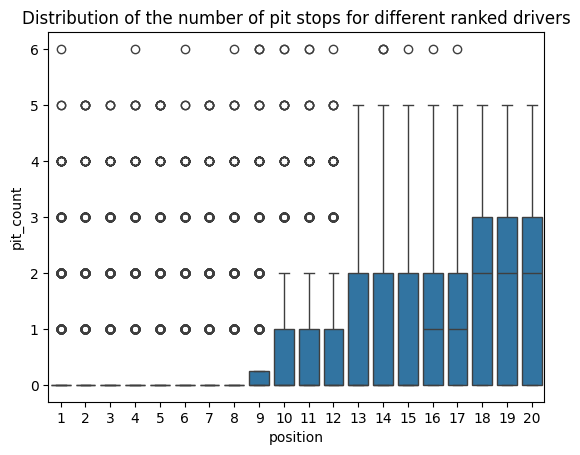

In [33]:
analysis_df = analysis_df.dropna(subset=['position'])
analysis_df['position'] = analysis_df['position'].astype(int)
sns.boxplot(
    x=analysis_df['position'].astype(int).clip(upper=20), 
    y=analysis_df['pit_count']
)
plt.title("Distribution of the number of pit stops for different ranked drivers")
plt.show()